In [19]:
from boxoffice.db.frames import get_box_office_day_frame_full, get_movie_frame_full

bodf = get_box_office_day_frame_full()
mdf = get_movie_frame_full()

Reading from movies.csv
Reading from movies.csv


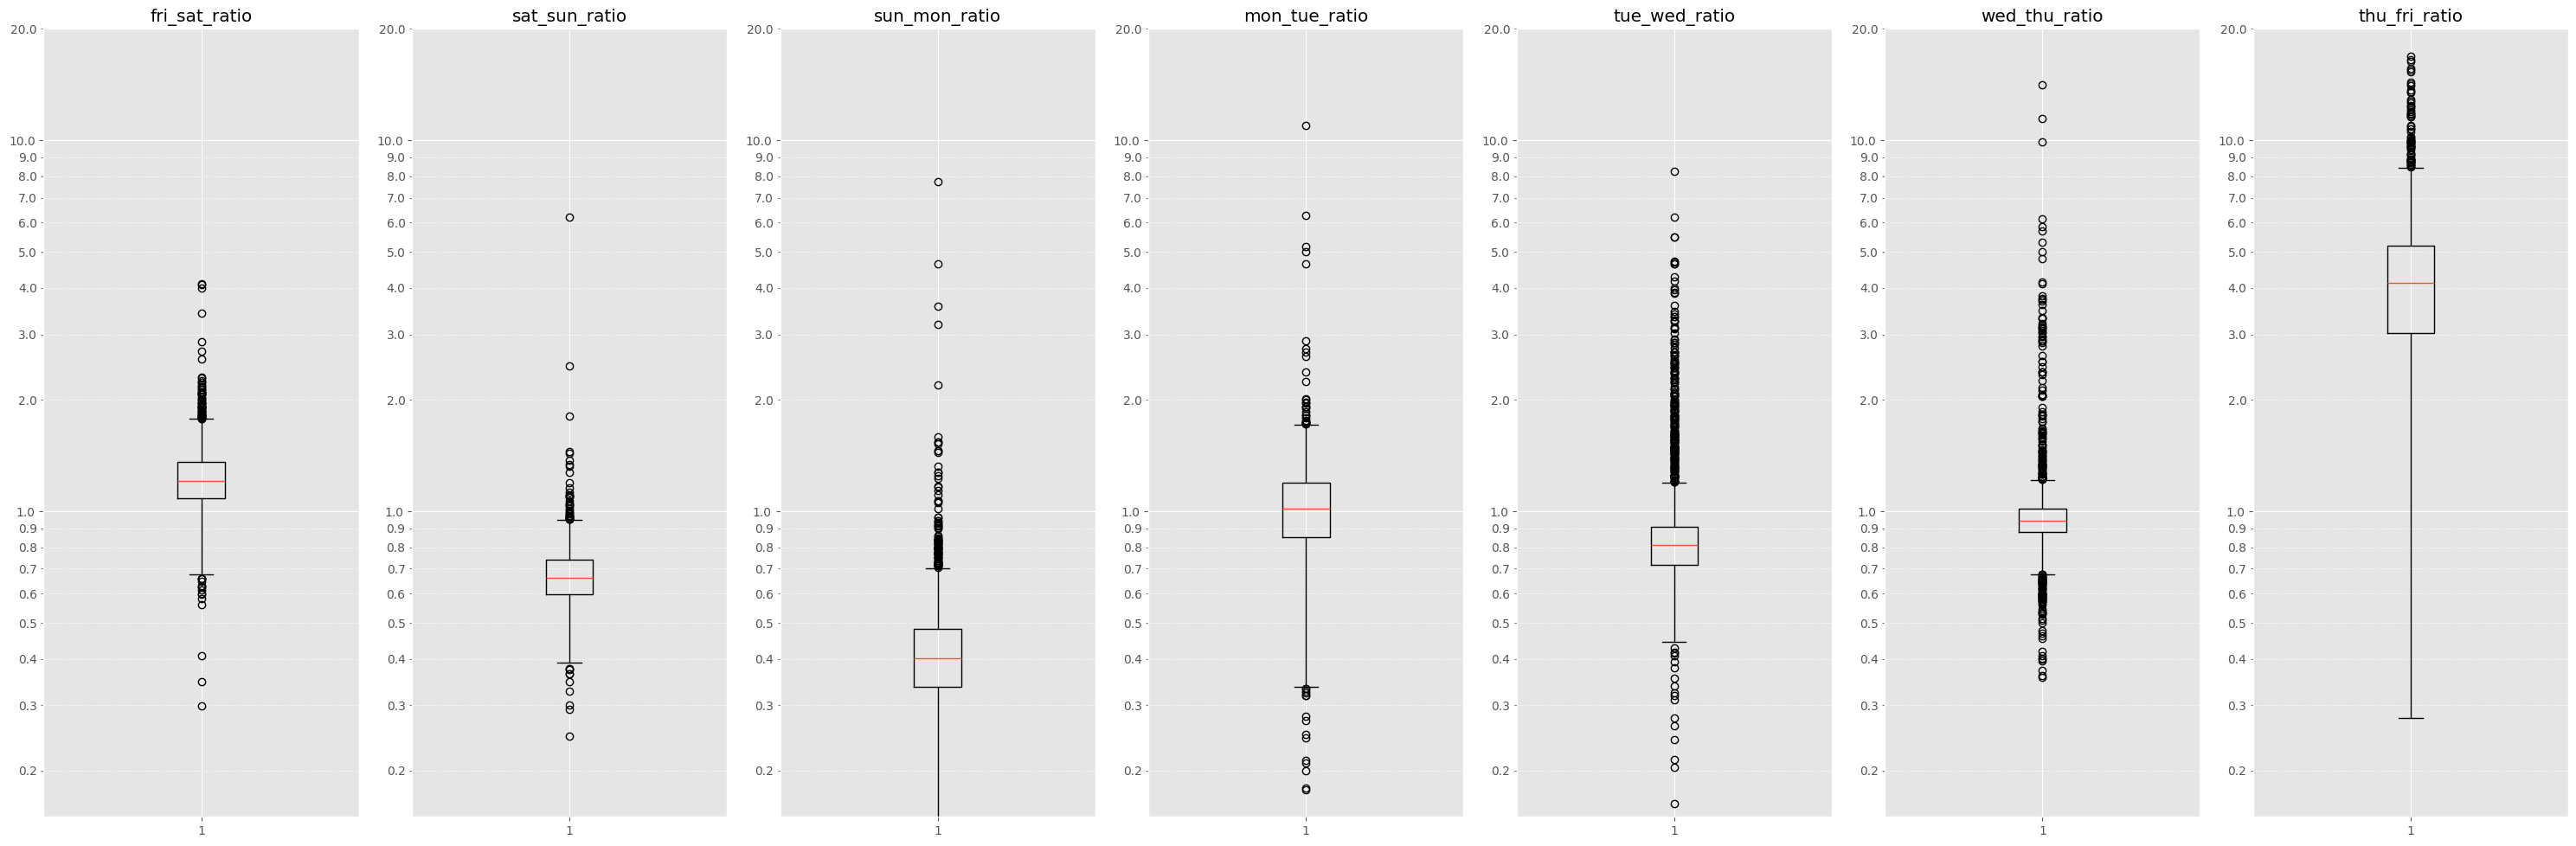

In [38]:
# make 7 plots with violin plots of the different ratios
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# fig, axs = plt.subplots(1, 7, figsize=(30, 10))

ratios = [
    'fri_sat_ratio','sat_sun_ratio','sun_mon_ratio','mon_tue_ratio','tue_wed_ratio','wed_thu_ratio','thu_fri_ratio'
]

global_min = min(mdf[ratio].min() for ratio in ratios)
global_max = max(mdf[ratio].max() for ratio in ratios)

global_min = 0.15
global_max = 20

fig, axs = plt.subplots(1, len(ratios), figsize=(30, 10))

# Define the formatter function
def two_decimals(x, pos):
    return f'{x:.1f}'

# Create the formatter
formatter = FuncFormatter(two_decimals)

for i, ratio in enumerate(ratios):
    axs[i].boxplot(mdf[ratio])
    axs[i].set_title(ratio)
    axs[i].set_ylim(global_min, global_max)
    # set log scale
    axs[i].set_yscale('log')
    # more y ticks
    axs[i].yaxis.set_major_formatter(plt.ScalarFormatter())
    axs[i].yaxis.set_minor_formatter(formatter)

    # make horizontal grid lines
    axs[i].yaxis.grid(True)
    axs[i].yaxis.grid(which='minor', linestyle=':')


# give it a pretty theme
plt.style.use('fivethirtyeight')

plt.tight_layout()
plt.show()